In [1]:
# example of loading the generator model and generating images
from numpy.random import randn
from tensorflow.keras.models import load_model
from matplotlib import pyplot
from numpy import asarray

In [2]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim*n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

In [3]:
# create a plot of generated images
def plot_generated_images(examples, n, size, name):
    pyplot.figure(figsize=(size,size))
    for i in range(n*n):
        pyplot.subplot(n,n,1+i)
        pyplot.axis('off')
        pyplot.imshow(examples[i,:,:])
    pyplot.savefig(f'{name}.jpg')
    pyplot.show()

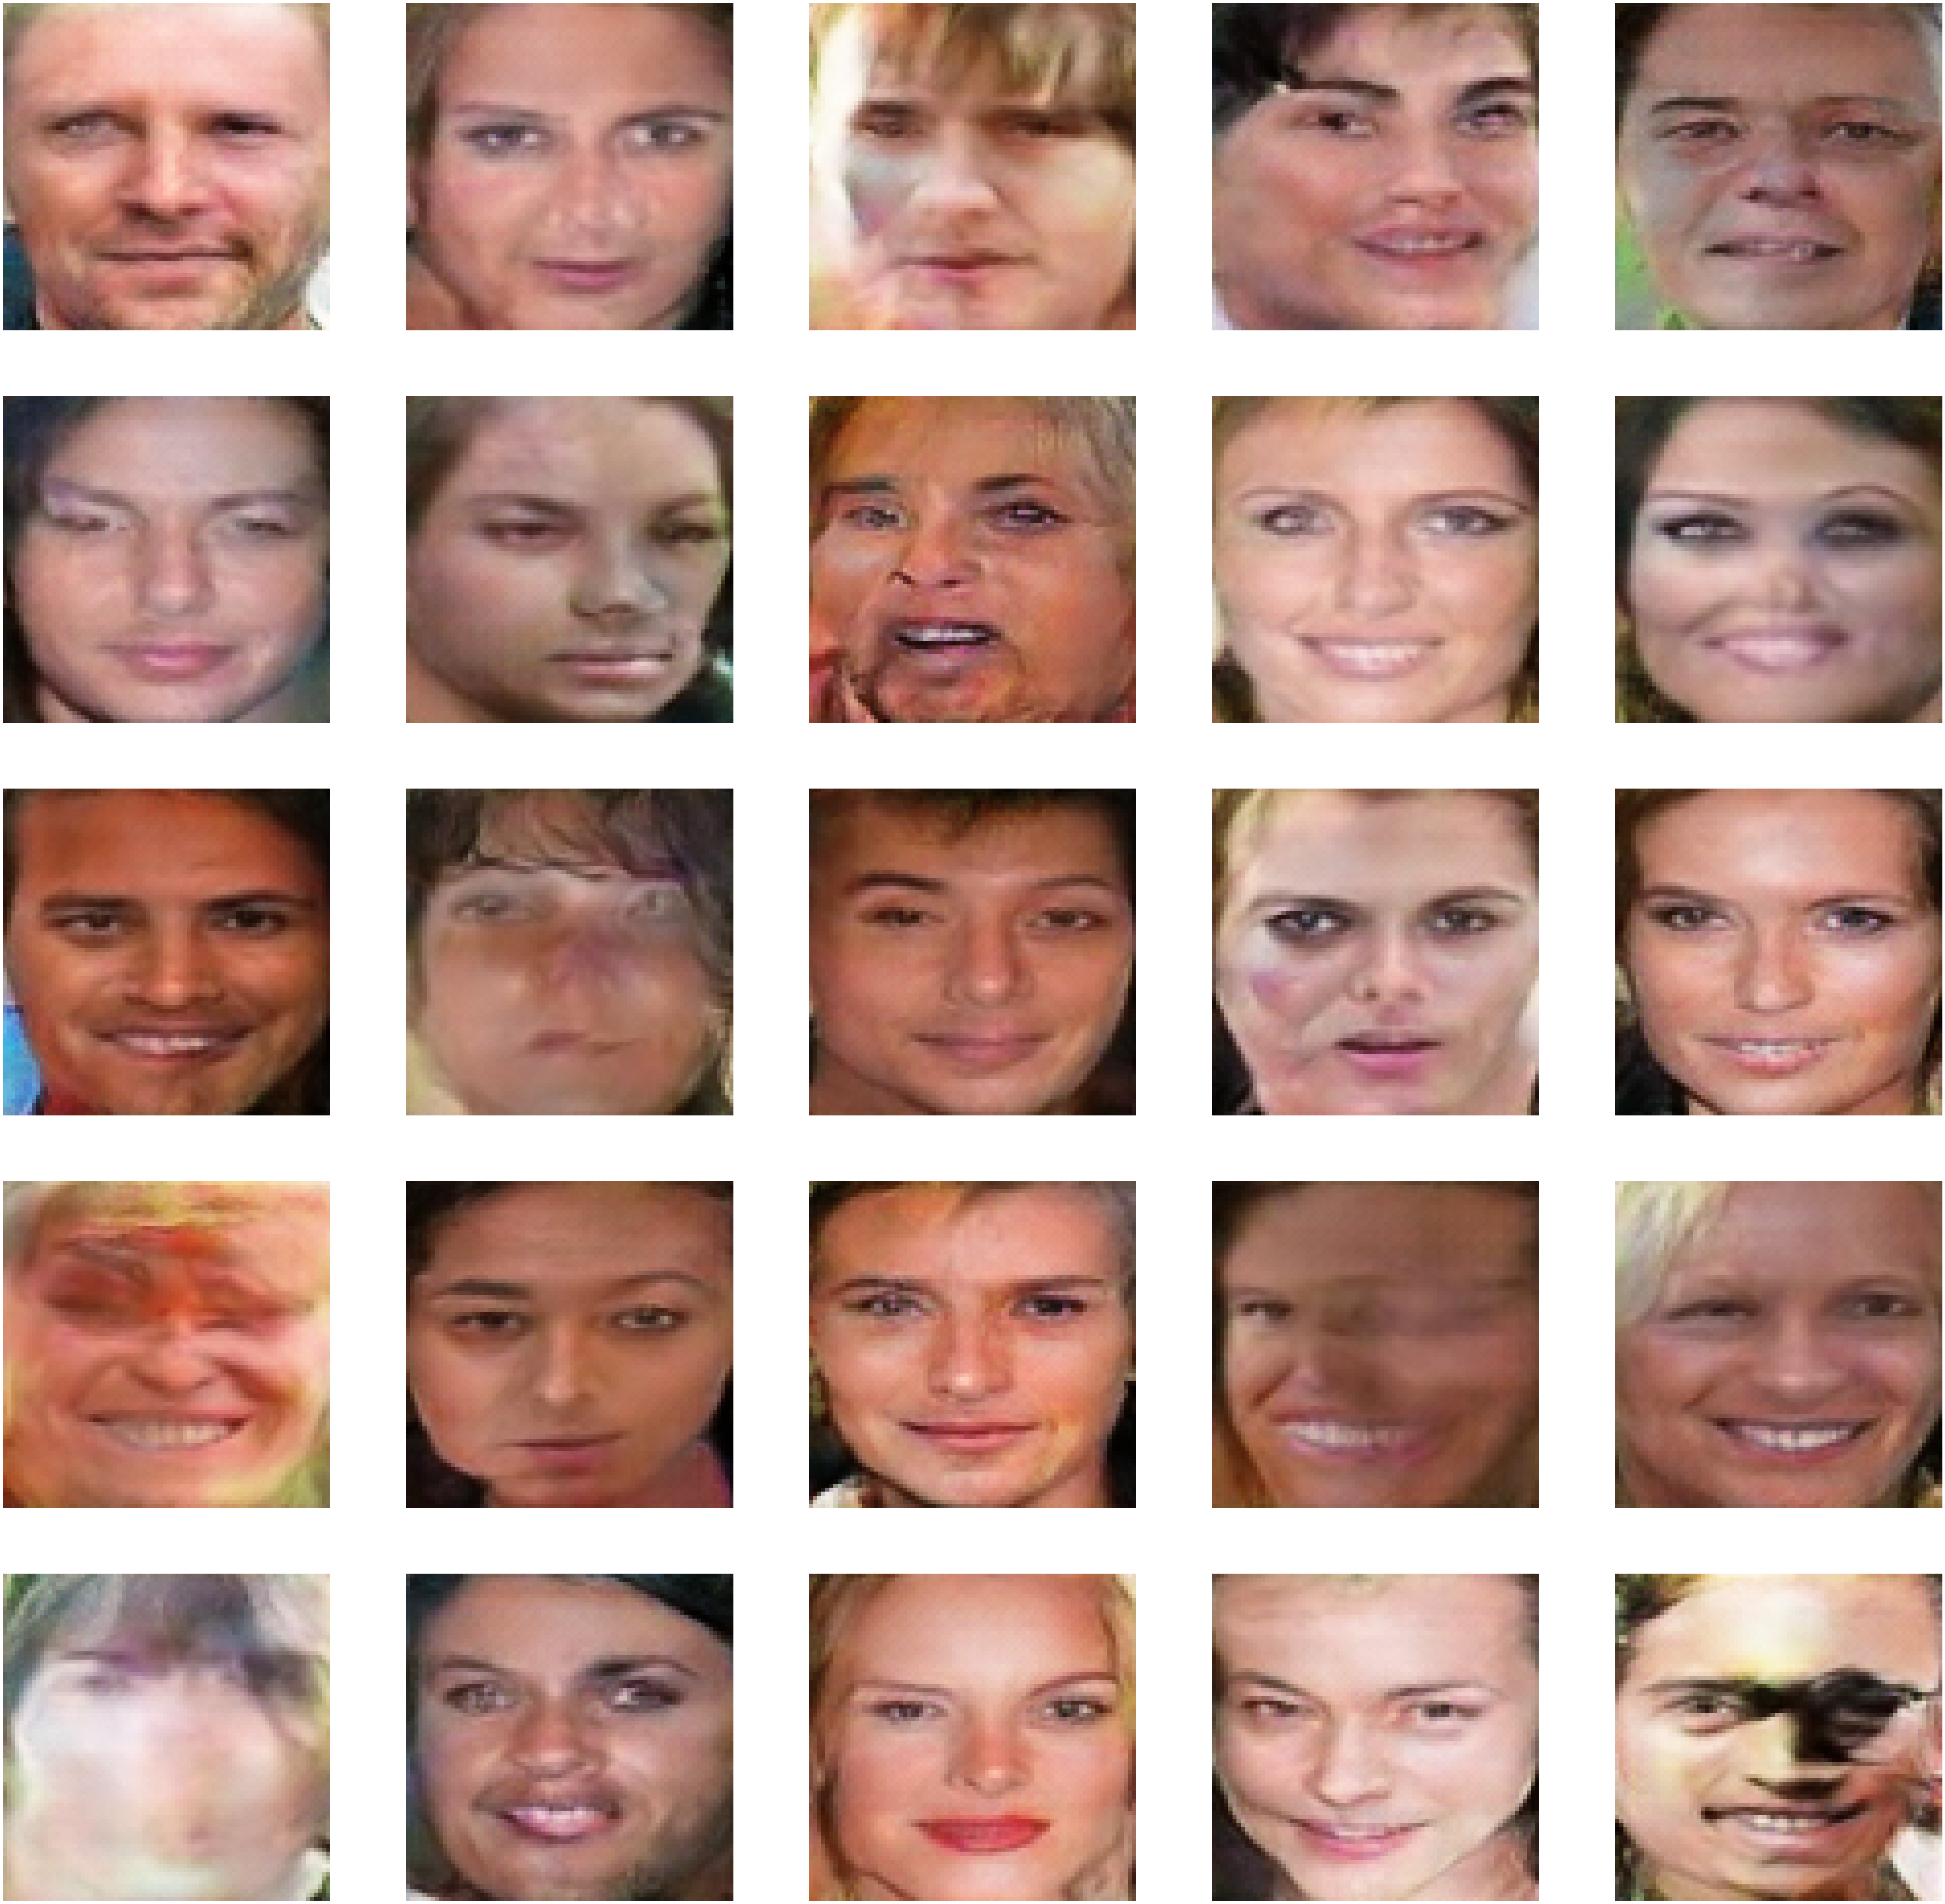

In [4]:
# load model
model = load_model(
    '/Users/xin/Documents/python_practice/GANsWithPython/chapter_9/models/generator_model_050.h5')
# generate images
latent_points = generate_latent_points(100,25)
X = model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X+1)/2.0
# plot the result
plot_generated_images(X, 5, 80, '003')

In [5]:
# uniform interpolation between two points in latent space
def interpolate_points(p1, p2, n_steps=10):
    # interpolate ratios between the points
    ratios = linspace(0, 1, num=n_steps)
    # linear interpolate vectors
    vectors = list()
    for ratio in ratios:
        v = (1.0 - ratio) * p1 + ratio*p2
        vectors.append(v)
    return asarray(vectors)

In [116]:
# example of interpolating between generated faces
from numpy import asarray, linspace

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in latent space
    x_input = randn(latent_dim*n_samples)
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

In [117]:
# uniform interpolation between two points in latent space
def interpolate_points(p1, p2, n_steps=10):
    # interpolate ratios between the points
    ratios = linspace(0,1,num=n_steps)
    # linear interpolate vectors
    vectors = list()
    for ratio in ratios:
        v = (1.0 - ratio) * p1 + ratio * p2
        vectors.append(v)
    return asarray(vectors)

In [128]:
# create a plot of generated images
def plot_generated(examples, n):
    pyplot.figure(figsize=(80,80))
    for i in range(n):
        pyplot.subplot(1,n,1+i)
        pyplot.axis('off')
        pyplot.imshow(examples[i,:,:])
    pyplot.savefig('i001.jpg')
    pyplot.show()

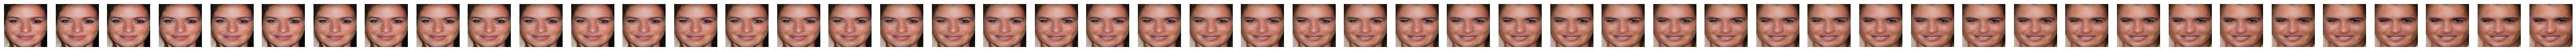

In [156]:
# load model
model = load_model(
    '/Users/xin/Documents/python_practice/GANsWithPython/chapter_9/models/generator_model_050.h5')

# generate points in latent space
pts = generate_latent_points(100,2)
# interpolate points in latent space
interpolated = interpolate_points(pts[0], pts[1], 50)
# generate images
X = model.predict(interpolated)
# scale from [-1,1] to [0,1]
X = (X+1)/2.0
# plot result
plot_generated(X, len(interpolated))

In [28]:
# example of interpolating between generated faces
from numpy import asarray, vstack, linspace
from numpy.random import randn
from tensorflow.keras.models import load_model
from matplotlib import pyplot

In [29]:
# generate points in latent space
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim*n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

In [31]:
# uniform interpolation between two points in latent space
def interpolate_points(p1,p2,n_steps=10):
    # interpolate ratios between the points
    ratios = linspace(0,1, num=n_steps)
    # linear interpolate vectors
    vectors = list()
    for ratio in ratios:
        v = (1.0-ratio) * p1 + ratio * p2
        vectors.append(v)
    return asarray(vectors)

In [62]:
# create a plot of generated images
def plot_generated(examples, n):
    pyplot.figure(figsize=(20,20))
    # plot images
    for i in range(n*n):
        # define subplot
        pyplot.subplot(n,n,1+i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(examples[i])
    pyplot.show()

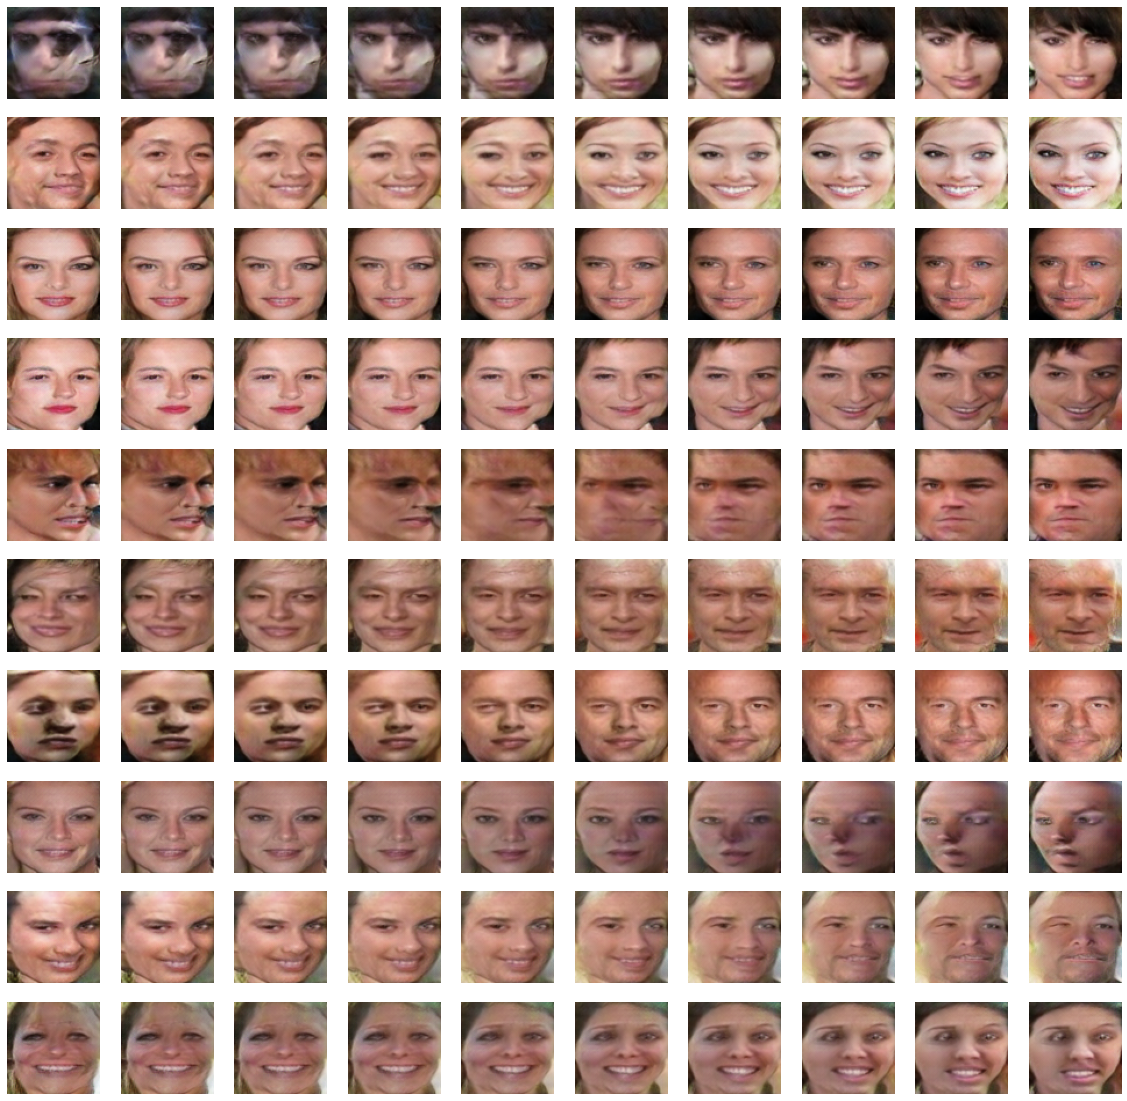

In [63]:
# load model
model = load_model(
    '/Users/xin/Documents/python_practice/GANsWithPython/chapter_9/models/generator_model_050.h5')
# generate points in latent space
n = 20
pts = generate_latent_points(100,n)
# interpolate pairs
results = None
for i in range(0,n,2):
    interpolated = interpolate_points(pts[i],pts[i+1])
    # generate images
    X = model.predict(interpolated)
    # scale from [-1,1] to [0,1]
    X = (X+1)/2.0
    if results is None:
        results = X
    else:
        results = vstack((results,X))
# plot the result
plot_generated(results,10)    

In [64]:
# spherical linear interpolation (slerp)
def slerp(val, low, high):
    omega = arccos(clip(dot(low/norm(low), high/norm(high)), -1, 1))
    so = sin(omega)
    if so == 0:
        # L'Hopital's rule/LERP
        return (1.0-val)*low + val*high
    return sin((1.0-val)*omega)/so*low + sin(val*omega)/so*high

In [72]:
# example of interpolating between generated faces
from numpy import asarray, vstack, arccos, clip, dot, linspace, sin
from numpy.random import randn
from numpy.linalg import norm
from tensorflow.keras.models import load_model
from matplotlib import pyplot

In [66]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim*n_samples)
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

In [67]:
# spherical linear interpolation (slerp)
def slerp(val, low, high):
    omega = arccos(clip(dot(low/norm(low), high/norm(high)), -1,1))
    so = sin(omega)
    if so==0:
        return (1.0-val)*low + val*high
    return sin((1.0-val)*omega)/so * low + sin(val*omega)/so * high

In [69]:
def interoplate_points(p1, p2, n_steps=10):
    ratios = linspace(0,1,num=n_steps)
    vectors = list()
    for ratio in ratios:
        v = slerp(ratio, p1,p2)
        vectors.append(v)
    return asarray(vectors)

In [86]:
def plot_generated(examples, n):
    pyplot.figure(figsize=(20,20))
    for i in range(n*n):
        
        pyplot.subplot(n,n,1+i)
        pyplot.axis('off')
        pyplot.imshow(examples[i,:,:])
    pyplot.show()

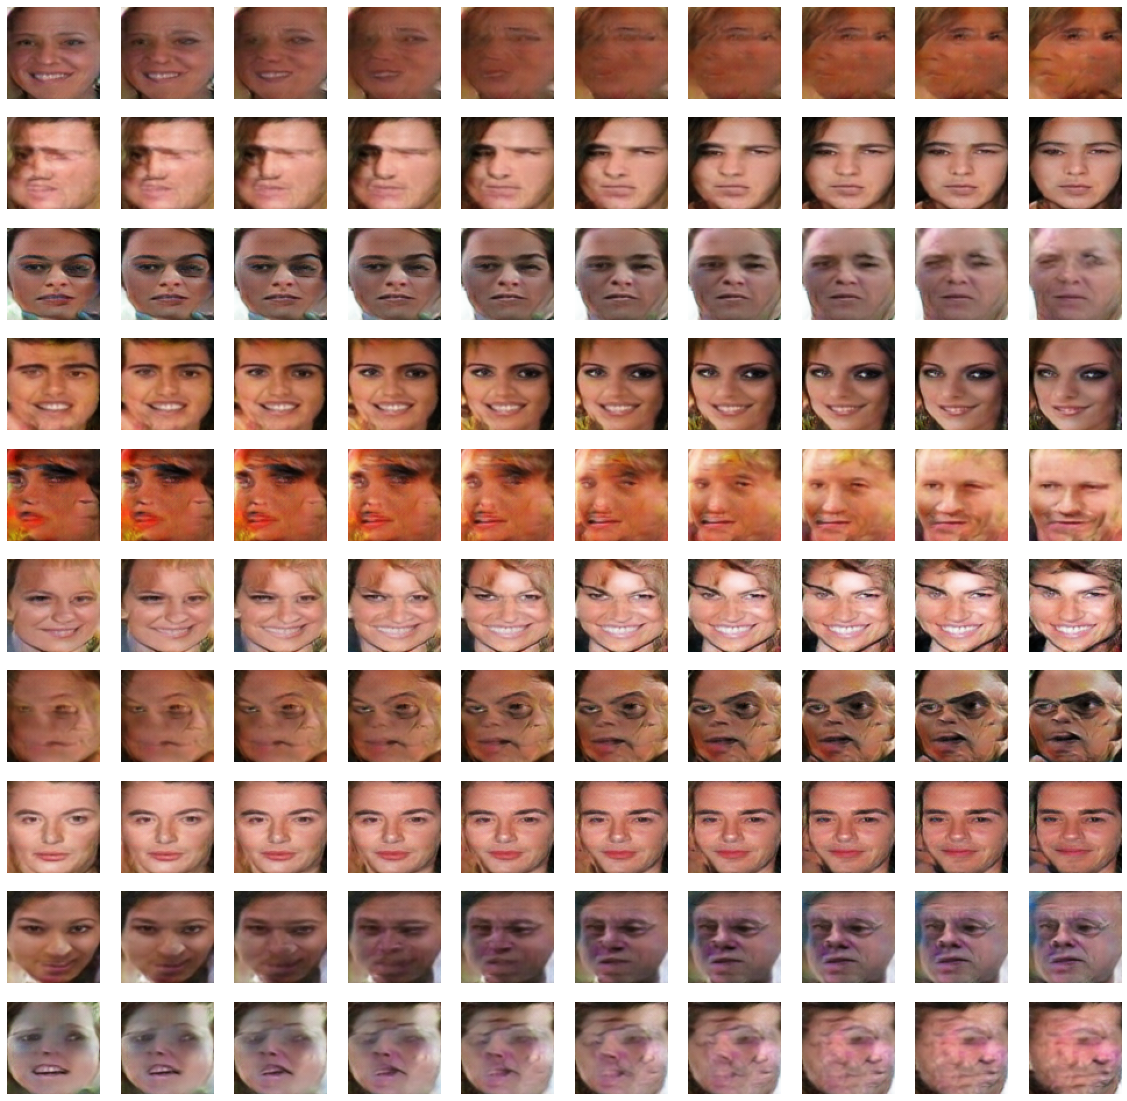

In [91]:
model = load_model(
    '/Users/xin/Documents/python_practice/GANsWithPython/chapter_9/models/generator_model_050.h5')
n = 20
pts = generate_latent_points(100,n)
results = None
for i in range(0,n,2):
    interpolated = interoplate_points(pts[i],pts[i+1])
    X = model.predict(interpolated)
    X = (X+1)/2.0
    if results is None:
        results = X
    else:
        results = vstack((results,X))
plot_generated(results,10)

In [105]:
# example of loading the generator model and generating faces
from numpy.random import randn
from tensorflow.keras.models import load_model
from matplotlib import pyplot
from numpy import savez_compressed, load, mean

In [93]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim*n_samples)
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

In [94]:
def plot_generated(examples, n):
    pyplot.figure(figsize=(20,20))
    for i in range(n*n):
        pyplot.subplot(n,n,1+i)
        pyplot.axis('off')
        pyplot.imshow(examples[i,:,:])
    pyplot.savefig('generated_faces.jpg')
    pyplot.close()

In [95]:
model = load_model(
    '/Users/xin/Documents/python_practice/GANsWithPython/chapter_9/models/generator_model_050.h5')
latent_points = generate_latent_points(100,100)
savez_compressed('latent_points.npz', latent_points)

In [96]:
X = model.predict(latent_points)
X = (X+1)/2.0
plot_generated(X,10)

In [102]:
smiling_woman_ix = [46, 73, 95]
neutral_woman_ix = [4, 82, 74]
neutral_man_ix = [23, 37, 89]

In [100]:
data = load('latent_points.npz')
points = data['arr_0']

In [101]:
# average list of latent space vectors
def average_points(points, ix):
    # convert to zero offset points
    zero_ix = [i-1 for i in ix]
    # retrieve required points
    vectors = points[zero_ix]
    # average vectors
    avg_vector = mean(vectors, axis=0)
    # combine original and avg vectors
    all_vectors = vstack((vectors, avg_vector))
    return all_vectors

In [ ]:
# average vectors
smiling_woman = average_points(points, smiling_woman_ix)
neutral_woman = average_points(points, neutral_woman_ix)
neutral_man = average_points(points, neutral_man_ix)
# combine all vectors
all_vectors = vstack((smiling_woman, neutral_woman, neutral_man))
# generate images
images = model.predict(all_vectors)
# scale pixel values
images = (images+1)/2.0
plot_generated(images, 3,4)

---

In [109]:
# example of loading the generator model and generating imgaes
from numpy import load, mean, vstack, expand_dims
from tensorflow.keras.models import load_model
from matplotlib import pyplot

In [110]:
def average_points(points, ix):
    zero_ix = [i-1 for i in ix]
    vectors = points[zero_ix]
    avg_vector = mean(vectors, axis=0)
    all_vectors = vstack((vectors, avg_vector))
    return all_vectors

In [111]:
def plot_generated(examples, rows, cols):
    for i in range(rows*cols):
        pyplot.subplot(rows, cols, 1+i)
        pyplot.axis('off')
        pyplot.imshow(examples[i,:,:])
    pyplot.show()

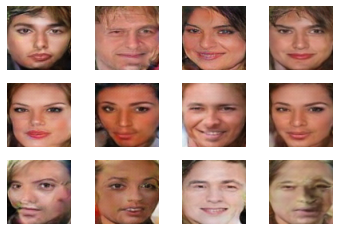

In [112]:
model = load_model(
    '/Users/xin/Documents/python_practice/GANsWithPython/chapter_9/models/generator_model_050.h5')

smiling_woman_ix = [46, 73, 95]
neutral_woman_ix = [4, 82, 74]
neutral_man_ix = [23, 37, 89]

data = load('latent_points.npz')
points = data['arr_0']

smiling_woman = average_points(points, smiling_woman_ix)
neutral_woman = average_points(points, neutral_woman_ix)
neutral_man = average_points(points, neutral_man_ix)

all_vectors = vstack((smiling_woman, neutral_woman, neutral_man))

images = model.predict(all_vectors)

images = (images+1)/2.0
plot_generated(images,3,4)

In [113]:
result_vector = smiling_woman[-1] - neutral_woman[-1] + neutral_man[-1]

In [114]:
result_vector = expand_dims(result_vector,0)

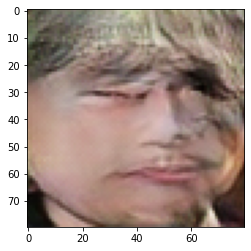

In [115]:
result_image = model.predict(result_vector)
result_image = (result_image+1)/2.0
pyplot.imshow(result_image[0])
pyplot.show()